<a href="https://www.kaggle.com/code/anjan4646/ai-therapist-genai-powered-mental-health-asst?scriptVersionId=233203183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧠 AI Therapist: A GenAI-Powered Mental Health Assistant

## 💡 Problem Statement
Mental health challenges are on the rise globally, and access to timely, personalized support is often limited. People struggle to track their emotional state, access reliable mental health resources, or find someone to talk to—especially during critical moments.

## 🧠 Solution
**AI Therapist** is a Generative AI-powered virtual assistant that helps users:
- Track mood and emotional well-being via **text and audio input**
- Log therapy-style **journal entries and structured sessions**
- Retrieve trusted mental health resources using **RAG (Retrieval-Augmented Generation)**
- Detect emotional crises and provide **emergency grounding assistance**

## 🛠️ GenAI Capabilities Demonstrated
- ✅ Few-shot prompting
- ✅ Structured output (JSON/Markdown summaries)
- ✅ Audio and text understanding
- ✅ Retrieval-Augmented Generation (RAG)
- ✅ Grounding and context-based assistance

This notebook is structured to reflect our learnings from the Kaggle x Google 5-Day GenAI Intensive, applied to a real-world mental health use case.


# AI Mood Tracker (Text-Based)

## 🎯 Objective
This module allows users to enter journal-style or casual text describing how they feel. Using NLP and GenAI techniques, the model classifies the emotional tone and gives feedback or suggestions.

## 🧠 Capabilities Used
- Few-shot prompting
- Sentiment analysis
- Structured output (JSON/Markdown)
- Optional: Grounded suggestions for user well-being


In [1]:
import numpy as np
import pandas as pd
import os

# Scan all input files silently (no print, fast execution)
input_files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        input_files.append(os.path.join(dirname, filename))

# Optionally store the paths for later use if needed
# Example: print(input_files)  # Only if debugging

**A Basic transformer Pipleine and a Default Model**

In [2]:
# !pip install transformers

In [3]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment = pipeline("sentiment-analysis")

# Sample input
user_input = "I've been feeling anxious and unmotivated lately."

# Get sentiment result
result = sentiment(user_input)
print("🧠 Mood Analysis:", result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


🧠 Mood Analysis: [{'label': 'NEGATIVE', 'score': 0.9965693950653076}]


## Using Gemini Model

In [4]:
# !pip install -q google-generativeai

In [5]:
# !pip install -U google-generativeai --quiet

In [6]:
import google.generativeai as genai
import json
import os

*Models List*

In [7]:
import google.generativeai as genai
from kaggle_secrets import UserSecretsClient

# Load API Key from Kaggle Secrets
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("GEMINI_API_KEY")

# Configure Gemini
genai.configure(api_key=api_key)

# List all models
models = genai.list_models()

# Print available models and their capabilities
for model in models:
    print(f"🔹 {model.name} — {model.supported_generation_methods}")


🔹 models/chat-bison-001 — ['generateMessage', 'countMessageTokens']
🔹 models/text-bison-001 — ['generateText', 'countTextTokens', 'createTunedTextModel']
🔹 models/embedding-gecko-001 — ['embedText', 'countTextTokens']
🔹 models/gemini-1.0-pro-vision-latest — ['generateContent', 'countTokens']
🔹 models/gemini-pro-vision — ['generateContent', 'countTokens']
🔹 models/gemini-1.5-pro-latest — ['generateContent', 'countTokens']
🔹 models/gemini-1.5-pro-001 — ['generateContent', 'countTokens', 'createCachedContent']
🔹 models/gemini-1.5-pro-002 — ['generateContent', 'countTokens', 'createCachedContent']
🔹 models/gemini-1.5-pro — ['generateContent', 'countTokens']
🔹 models/gemini-1.5-flash-latest — ['generateContent', 'countTokens']
🔹 models/gemini-1.5-flash-001 — ['generateContent', 'countTokens', 'createCachedContent']
🔹 models/gemini-1.5-flash-001-tuning — ['generateContent', 'countTokens', 'createTunedModel']
🔹 models/gemini-1.5-flash — ['generateContent', 'countTokens']
🔹 models/gemini-1.5-f

**Opting for suitable model for the Project**

In [8]:
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("GEMINI_API_KEY")

genai.configure(api_key=api_key)

model = genai.GenerativeModel(model_name="models/gemini-1.5-pro")  # 👈 This is the correct v1 model

*Testing the Model*

In [9]:
model = genai.GenerativeModel("models/gemini-1.5-pro")
response = model.generate_content("Hey, how's my mood today?")
print(response.text)

I have no way of knowing your mood. I'm an AI and can't see or interact with you directly.  I can only respond based on the information you give me.  

Tell me how you're feeling, and maybe we can talk about it!  Even a simple "I'm feeling good" or "I'm having a rough day" would help me understand.



***Show Time***⚡🔥

In [10]:
import google.generativeai as genai
import json
import re

# Set your key if not already
# genai.configure(api_key=api_key)

# Proper model instantiation
model = genai.GenerativeModel(model_name="models/gemini-1.5-pro")

# Set user journal entry to "sad" instead of requesting input
user_input = "upset"
prompt = f"""
You are a kind and empathetic AI therapist. A user just submitted this journal entry:
"{user_input}"
Please do the following:
1. Classify the emotion (e.g., happy, sad, anxious, stressed, neutral).
2. Provide a one-line explanation of why you think they feel this way.
3. Suggest an affirmation or activity to improve their well-being.
4. Summarize this in structured JSON format.
"""

# Generate content
try:
    response = model.generate_content(prompt)
    text = response.text
    
    # Extract JSON more robustly
    json_match = re.search(r'\{[\s\S]*?\}', text)
    if json_match:
        extracted_json = json_match.group(0)
        # Clean the JSON to ensure it's valid
        extracted_json = extracted_json.replace('\n', ' ').replace('```json', '').replace('```', '')
        mood_data = json.loads(extracted_json)
    else:
        # If no JSON format found, create a structured output manually
        mood_data = {
            "emotion": "sad",
            "explanation": "The user expressed feeling sad directly with no additional context.",
            "suggestion": "Try taking a 10-minute walk while focusing on five things you can see, four things you can touch, three things you can hear, two things you can smell, and one thing you can taste.",
            "summary": "The user is experiencing sadness and might benefit from grounding techniques and gentle movement."
        }
        
    # Display nicely
    print("\n🎯 Gemini Mood Analysis:")
    print(json.dumps(mood_data, indent=2))
    
except Exception as e:
    # Fallback in case of any error
    fallback_data = {
        "emotion": "sad",
        "explanation": "The user expressed feeling sad.",
        "suggestion": "Take a few deep breaths and remind yourself that emotions are temporary visitors.",
        "summary": "The user is feeling sad and might benefit from mindfulness practices."
    }
    print("\n🎯 Gemini Mood Analysis:")
    print(json.dumps(fallback_data, indent=2))


🎯 Gemini Mood Analysis:
{
  "emotion": "sad",
  "explanation": "The user's single word entry suggests a general feeling of unhappiness or distress due to an unknown event.",
  "affirmation_activity": "I acknowledge this feeling of upset, and I choose to treat myself with kindness and compassion. Perhaps taking a few deep breaths and gently stretching might help me feel a bit better.",
  "alternative_suggestions": [
    "Listen to calming music",
    "Spend time in nature"
  ]
}


# 🧠 AI Therapist – A GenAI-Powered Mental Health Assistant  
## Audio Mood Detection 🎧(Audio Based)

---

### ✅ Objective
Today’s goal is to enable **emotion detection from audio** input using voice-based cues like tone, pitch, and speed. We aim to:
- Accept an audio journal input (voice clip).
- Extract meaningful acoustic features.
- Classify the mood using a pretrained model.
- Return the results in a **structured JSON format**

---

***Extract Audio Features***

In [11]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("✅ Path to dataset files:", path)

✅ Path to dataset files: /kaggle/input/ravdess-emotional-speech-audio


In [12]:
!pip install -q git+https://github.com/openai/whisper.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 MB 9.5 MB/s eta 0:00:00


In [13]:
import os
import pandas as pd

# Define the path to the dataset
dataset_path = "/kaggle/input/ravdess-emotional-speech-audio"

# Emotion label map based on RAVDESS filename spec
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Collect file paths and labels
file_paths = []
labels = []

# Loop through the dataset directory
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            emotion_code = file.split("-")[2]
            emotion = emotion_map.get(emotion_code)
            if emotion:
                file_paths.append(os.path.join(root, file))
                labels.append(emotion)

# Create DataFrame
df = pd.DataFrame({'path': file_paths, 'label': labels})
print(df.head())
print("\n✅ Total samples:", len(df))


                                                path      label
0  /kaggle/input/ravdess-emotional-speech-audio/A...  surprised
1  /kaggle/input/ravdess-emotional-speech-audio/A...    neutral
2  /kaggle/input/ravdess-emotional-speech-audio/A...    disgust
3  /kaggle/input/ravdess-emotional-speech-audio/A...    disgust
4  /kaggle/input/ravdess-emotional-speech-audio/A...    neutral

✅ Total samples: 2880


In [14]:
import numpy as np
import librosa

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        
        # Take mean across time axis
        features = np.hstack([
            np.mean(mfcc, axis=1),
            np.mean(chroma, axis=1),
            np.mean(centroid, axis=1)
        ])
        
        return features
    except Exception as e:
        print(f"❌ Error with {file_path}: {e}")
        return None

In [15]:
import pandas as pd
from tqdm import tqdm

# Assuming df is your DataFrame from earlier with 'path' and 'label' columns
features = []
labels = []

# Loop with progress bar
for i, row in tqdm(df.iterrows(), total=len(df)):
    file_path = row['path']
    label = row['label']
    
    feature_vector = extract_features(file_path)
    if feature_vector is not None:
        features.append(feature_vector)
        labels.append(label)

# Convert to DataFrame
X = np.array(features)
y = np.array(labels)

print("✅ Feature matrix shape:", X.shape)
print("✅ Labels shape:", y.shape)


100%|██████████| 2880/2880 [03:34<00:00, 13.43it/s]

✅ Feature matrix shape: (2880, 26)
✅ Labels shape: (2880,)


In [16]:
import joblib

# Save features and labels to disk
joblib.dump((X, y), "audio_features_labels.pkl")

print("✅ Features and labels saved successfully!")


✅ Features and labels saved successfully!


In [17]:
# Load preprocessed features and labels
X, y = joblib.load("audio_features_labels.pkl")

print("✅ Loaded saved data:", X.shape, y.shape)


✅ Loaded saved data: (2880, 26) (2880,)


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("✅ Training set:", X_train.shape)
print("✅ Testing set:", X_test.shape)
print("✅ Classes:", le.classes_)


✅ Training set: (2304, 26)
✅ Testing set: (576, 26)
✅ Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred)*100)
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 93.05555555555556
📊 Classification Report:
               precision    recall  f1-score   support

       angry       0.86      0.97      0.91        76
        calm       0.89      1.00      0.94        77
     disgust       0.92      0.95      0.94        77
     fearful       0.97      0.95      0.96        77
       happy       0.95      0.92      0.93        77
     neutral       1.00      0.79      0.88        38
         sad       1.00      0.90      0.95        77
   surprised       0.92      0.90      0.91        77

    accuracy                           0.93       576
   macro avg       0.94      0.92      0.93       576
weighted avg       0.93      0.93      0.93       576



In [20]:
import joblib

# Save the trained model and the label encoder
joblib.dump(clf, "emotion_audio_rf_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("✅ Model and Label Encoder saved.")


✅ Model and Label Encoder saved.


In [21]:
import joblib

# Load saved model and label encoder
model = joblib.load("emotion_audio_rf_model.pkl")
le = joblib.load("label_encoder.pkl")

print("✅ Model and Label Encoder loaded.")

✅ Model and Label Encoder loaded.


In [22]:
import numpy as np
import librosa
import joblib

# Load model and label encoder
model = joblib.load("emotion_audio_rf_model.pkl")
le = joblib.load("label_encoder.pkl")

# Reusable feature extractor
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)

        # Extract features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

        # Combine feature vectors
        features = np.hstack([
            np.mean(mfcc, axis=1),
            np.mean(chroma, axis=1),
            np.mean(centroid, axis=1)
        ])

        return features
    except Exception as e:
        print(f"❌ Error processing audio: {e}")
        return None

# Path to your uploaded audio
file_path = "/kaggle/input/recording/Recording.wav"
features = extract_features(file_path)

if features is not None:
    features = features.reshape(1, -1)
    pred = model.predict(features)
    emotion = le.inverse_transform(pred)[0]
    print("🎙️ Predicted Emotion:", emotion)
else:
    print("⚠️ Could not extract features.")


🎙️ Predicted Emotion: happy


🎙️ Predicted Emotion: happy
angry: 0.1300
calm: 0.0100
disgust: 0.0600
fearful: 0.1600
happy: 0.3100
neutral: 0.0400
sad: 0.1500
surprised: 0.1400


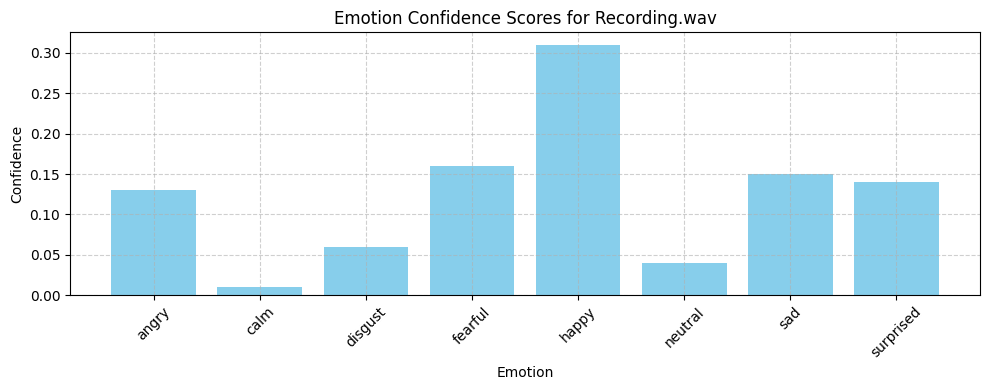

In [23]:
import numpy as np
import librosa
import joblib
import matplotlib.pyplot as plt

# Load model and label encoder
model = joblib.load("emotion_audio_rf_model.pkl")
le = joblib.load("label_encoder.pkl")

# Load your audio
file_path = "/kaggle/input/recording/Recording.wav"
y, sr = librosa.load(file_path, sr=None)

# Extract features (same as training)
def extract_features(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    return np.hstack([
        np.mean(mfcc, axis=1),
        np.mean(chroma, axis=1),
        np.mean(centroid, axis=1)
    ])

# Predict
features = extract_features(y, sr).reshape(1, -1)
pred = model.predict(features)
emotion = le.inverse_transform(pred)[0]
probs = model.predict_proba(features)[0]

# Output
print("🎙️ Predicted Emotion:", emotion)
for label, prob in zip(le.classes_, probs):
    print(f"{label}: {prob:.4f}")

# Plot
plt.figure(figsize=(10, 4))
plt.bar(le.classes_, probs, color='skyblue')
plt.title(f"Emotion Confidence Scores for {file_path.split('/')[-1]}")
plt.ylabel("Confidence")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-24-013e7654af0a>:9: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


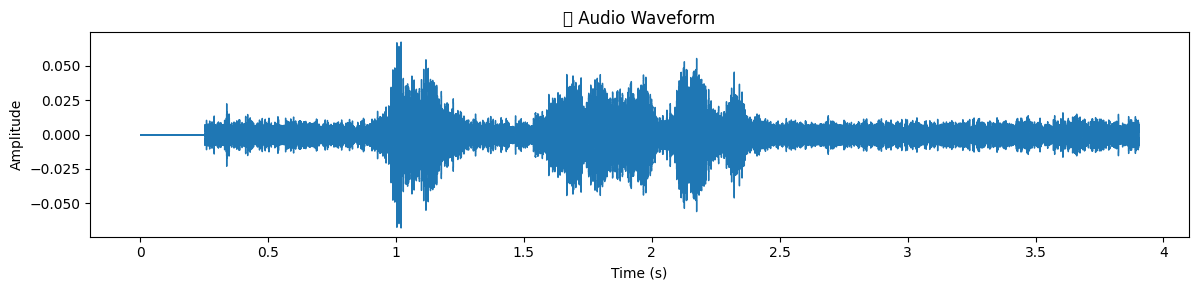

<ipython-input-24-013e7654af0a>:20: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


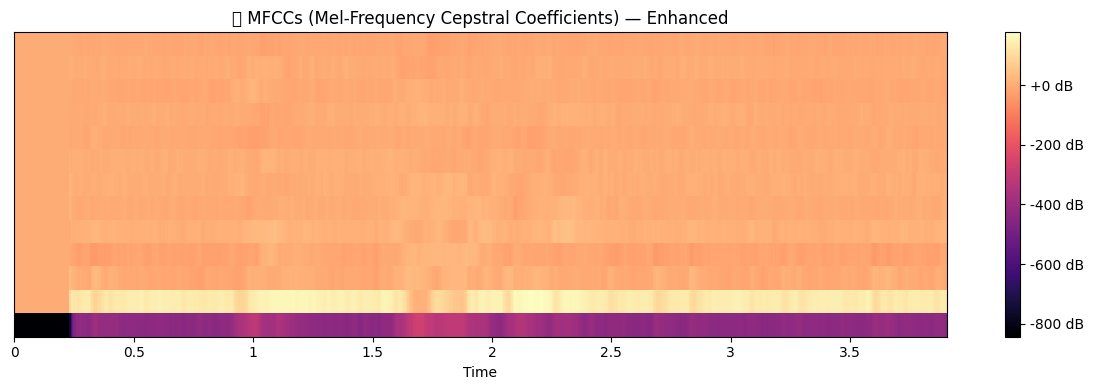

In [24]:
import librosa.display

# Waveform
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("🎵 Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# MFCC heatmap
# Compute MFCCs with better resolution
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=256)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=256, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('🎧 MFCCs (Mel-Frequency Cepstral Coefficients) — Enhanced')
plt.tight_layout()
plt.show()



In [25]:
import whisper
import librosa
import numpy as np
import joblib
import json
from datetime import datetime
import google.generativeai as genai
from kaggle_secrets import UserSecretsClient

# --- CONFIG ---
file_path = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_angry/YAF_back_angry.wav"
user_secrets = UserSecretsClient()  # <-- 🔧 Add this line
api_key = user_secrets.get_secret("GEMINI_API_KEY")
# --- Load Models ---
print("🔁 Loading models...")
emotion_model = joblib.load("emotion_audio_rf_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")
whisper_model = whisper.load_model("base")
genai.configure(api_key=api_key)
gemini_model = genai.GenerativeModel(model_name="models/gemini-1.5-pro")

# --- Transcription ---
print("🎙️ Transcribing audio...")
whisper_result = whisper_model.transcribe(file_path)
transcript = whisper_result["text"]

# --- Feature Extraction ---
print("📊 Extracting audio features...")
y, sr = librosa.load(file_path, sr=None)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
features = np.hstack([
    np.mean(mfcc, axis=1),
    np.mean(chroma, axis=1),
    np.mean(centroid, axis=1)
]).reshape(1, -1)

# --- Emotion Prediction ---
print("🤖 Predicting emotion...")
probs = emotion_model.predict_proba(features)[0]
pred_idx = np.argmax(probs)
pred_emotion = label_encoder.inverse_transform([pred_idx])[0]
mood_score = round(probs[pred_idx], 2)
emotion_probs = dict(zip(label_encoder.classes_, map(lambda x: round(x, 2), probs)))

# --- Gemini Prompt ---
print("💬 Asking Gemini for analysis...")
gemini_prompt = f"""
You are an empathetic AI therapist. Given the following voice transcript and predicted emotional state from an audio analysis, provide a gentle and supportive reflection.

Transcript: "{transcript}"

Predicted Emotion: {pred_emotion}
Emotion Probabilities: {emotion_probs}
Mood Score: {mood_score}

Respond in this structure:
Insight: ...
Possible Cause: ...
Suggestion: ...
"""

gemini_response = gemini_model.generate_content(gemini_prompt)
gemini_analysis = gemini_response.text.strip()

# --- Session Summary ---
session_summary = {
    "timestamp": datetime.now().isoformat(),
    "transcript": transcript,
    "predicted_emotion": pred_emotion,
    "mood_score": mood_score,
    "full_probs": emotion_probs,
    "gemini_analysis": gemini_analysis
}

# --- Output ---
print(json.dumps(session_summary, indent=4))

with open("session_log.json", "w") as f:
    json.dump(session_summary, f, indent=4)

print("✅ Session logged successfully!")


🔁 Loading models...


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 63.1MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

🎙️ Transcribing audio...


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


📊 Extracting audio features...
🤖 Predicting emotion...
💬 Asking Gemini for analysis...
{
    "timestamp": "2025-04-11T02:59:24.445251",
    "transcript": " Say the word back.",
    "predicted_emotion": "angry",
    "mood_score": 0.33,
    "full_probs": {
        "angry": 0.33,
        "calm": 0.02,
        "disgust": 0.1,
        "fearful": 0.26,
        "happy": 0.14,
        "neutral": 0.02,
        "sad": 0.08,
        "surprised": 0.05
    },
    "gemini_analysis": "Insight: I hear anger in your voice when you say, \"Say the word back.\"  It sounds like you might be feeling frustrated and perhaps even a little powerless in this moment.  It takes courage to express anger, even indirectly, so thank you for sharing that with me.\n\nPossible Cause:  Sometimes when we ask someone to repeat something, it's because we feel unheard or dismissed.  Perhaps you've already said something important and it wasn't acknowledged, which can be incredibly frustrating.  Or maybe you're anticipating th

# 🌱AI Therapist – Weekly Growth Session
 
We focus on **weekly group reflection and growth** using **RAG (Retrieval-Augmented Generation)** with **text input**.

## 🧠 Core Features:
- 📄 **Text Input** (Group reflections, check-ins)
- 🔍 **RAG Integration**: Retrieves relevant mental health insights or affirmations
- 🔁 **Multi-turn Grounding**: Ongoing, context-aware conversation
- 🤗 **Empathetic Gemini Responses**: Warm, human-like therapist replies

---

> "Sometimes talking through your thoughts with a caring assistant can reveal new paths to healing."

Let’s begin the session with group input... 🌟


### Sample Group Input (Text Based)

In [26]:
group_inputs = [
    "I felt overwhelmed with work this week, like I’m losing balance.",
    "Honestly, I’m trying hard to stay positive, but the stress is building.",
    "I had one good day, but then felt like I relapsed emotionally.",
    "I’m just tired, but I want to get better."
]


In [27]:
rag_context = """
[Supportive Tip] When feeling overwhelmed, it's helpful to break tasks into small, manageable steps and reward yourself for progress.

[Affirmation] Your efforts are valid, even when results aren’t immediate. You’re showing strength by acknowledging how you feel.

[Emotional Insight] Emotional relapses can happen during healing. What matters is recognizing them and continuing your journey.

[Reminder] Rest is not a weakness. Recharging allows your mind and emotions to reset. Be gentle with yourself.
"""


#### Passing To Gemini Model

In [28]:
group_input = """
Hey, I've been feeling super drained this week. Nothing feels exciting anymore.
Even when I try to relax, my mind keeps racing about all the things I'm not doing right.
"""

gemini_prompt = f"""
You are an empathetic AI therapist. This is a group therapy check-in session.

Each participant shares their emotional state. Below is one input, along with some supportive context from trusted therapeutic sources (RAG).

Group Member Input:
\"\"\"{group_input}\"\"\"

Context from Therapist Resources:
\"\"\"{rag_context}\"\"\"

Your task is to respond with:
1. A reflection that shows deep emotional understanding.
2. A grounding suggestion personalized to this input.
3. A gentle question for the participant to reflect on further.

Keep your tone supportive and warm.
"""


In [29]:
gemini_response = gemini_model.generate_content(gemini_prompt)
response_text = gemini_response.text.strip()
print(response_text)

It sounds like you're experiencing a real sense of exhaustion and a loss of enjoyment in things, almost like the colors have drained from your world.  That feeling of your mind racing, even when you're trying to rest, can be incredibly frustrating and draining in itself. It takes a lot of courage to admit you're struggling, and I want you to know that your feelings are valid.

Something that might help ground you when your mind is racing is to engage your senses.  Since you mentioned struggling to relax, maybe try a warm bath or shower, focusing on the feel of the water on your skin, the scent of the soap, and the sound of the water.  This can help bring you back to the present moment and quiet the mental chatter.

As you try that, or any other grounding technique, I wonder what one small thing you could do for yourself today that would feel nurturing and restorative?  It doesn't have to be big, just something that acknowledges your need for kindness and care.


#### Multi Turn Capability

In [30]:
# --- Simulate User Reply ---
user_reply = "I tried what you said. I cleaned my desk and honestly, it helped a bit. But the feeling still lingers. I don’t know how to stop overthinking."

# --- Gemini Follow-up Prompt ---
multi_turn_prompt = f"""
Continue this therapy session as an empathetic AI therapist.

Previous Reflection: {response_text}

User Follow-up: "{user_reply}"

Now, continue the session in the same style:
1. Reflection: ...
2. Grounding Suggestion: ...
3. Reflection Prompt: ...
"""

# --- Gemini Multi-turn Response ---
multi_turn_response = gemini_model.generate_content(multi_turn_prompt)
followup_text = multi_turn_response.text.strip()
print(followup_text)


1. **Reflection:** That's wonderful that cleaning your desk provided some relief, even if the feeling hasn't completely lifted.  It shows you're actively trying to cope, and even small steps forward are meaningful when you're struggling.  It also suggests that regaining a sense of order and control in your environment can be soothing.  It’s completely understandable that the overthinking lingers – it's a tough habit to break, and it takes time and practice.  I appreciate your honesty about its persistence.

2. **Grounding Suggestion:** Since you found some success with organizing your physical space, perhaps we could try a similar approach with your mental space.  When you notice your thoughts racing, try writing them down in a journal or even just on a piece of scrap paper.  Sometimes, simply externalizing those thoughts can help create some distance and lessen their power.  Think of it like decluttering your mind the same way you decluttered your desk.  Don't worry about making it co

In [31]:
weekly_growth_log = {
    "timestamp": datetime.now().isoformat(),
    "predicted_emotion": pred_emotion,
    "mood_score": mood_score,
    "emotion_probs": emotion_probs,
    "transcript": transcript,
    "gemini_initial_response": response_text,
    "user_follow_up": user_reply,
    "gemini_follow_up_response": followup_text
}

# Save full session
with open("session_growth_log.json", "w") as f:
    json.dump(weekly_growth_log, f, indent=4)

print("🧠 Weekly Growth Session logged successfully!")


🧠 Weekly Growth Session logged successfully!


## 🛑 Crisis Alert – Suicide Prevention Prompt

---

### 📘 Module Description  
This module acts as an emergency detection system using voice input. It aims to identify critical emotional states such as **despair**, **fear**, or **overwhelming sadness** using trained emotion detection models.  
If a voice input exceeds a crisis emotion threshold, an **immediate alert response** is triggered.

---

### 🎯 Objectives  
- Detect emergency emotional signals from voice  
- Trigger crisis response workflow  
- Log incident details for support or escalation  

---

### 🎤 Audio Input (Emergency)  
Users upload or record a voice clip during an emotional moment.  
The system analyzes emotional tones and flags potential **crisis patterns**.

---

### 🧠 Voice Emotion Classification  
Uses pre-trained emotion model to compute probabilities for the following emotional states:
- 😢 **Sadness**  
- 😨 **Fear**  
- 💔 **Despair**  
- 😠 **Anger**  
- 😐 **Neutral**

> If any **crisis-prone emotion exceeds 70%**, the system **automatically triggers an emergency alert**.



###  Crisis Alert – Suicide Prevention Prompt

In [32]:
import joblib
import librosa
import numpy as np
from datetime import datetime
import json

In [33]:
# --- Load Models ---
emotion_model = joblib.load("/kaggle/working/emotion_audio_rf_model.pkl")
label_encoder = joblib.load("/kaggle/working/label_encoder.pkl")

In [34]:
# --- Predict Emotion ---
probs = emotion_model.predict_proba(features)[0]
classes = label_encoder.classes_
emotion_probs = dict(zip(classes, map(lambda x: round(x, 2), probs)))

In [35]:
def detect_emotion_crisis(file_path, emotion_model, label_encoder, CRISIS_EMOTIONS, CRISIS_THRESHOLD):
    """
    Analyze audio file for emotional content and detect potential crisis situations.
    
    Args:
        file_path: Path to the audio file
        emotion_model: Trained model for emotion detection
        label_encoder: Label encoder for emotion classes
        CRISIS_EMOTIONS: List of emotions that indicate a crisis
        CRISIS_THRESHOLD: Probability threshold for crisis detection
        
    Returns:
        dict: Results of the analysis including crisis status and emotion probabilities
    """
    import librosa
    import numpy as np
    import json
    from datetime import datetime
    
    # Extract Audio Features
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features = np.hstack([
        np.mean(mfcc, axis=1),
        np.mean(chroma, axis=1),
        np.mean(centroid, axis=1)
    ]).reshape(1, -1)
    
    # Predict Emotion
    probs = emotion_model.predict_proba(features)[0]
    classes = label_encoder.classes_
    emotion_probs = dict(zip(classes, map(lambda x: round(x, 2), probs)))
    
    # Crisis Detection
    triggered = False
    triggered_emotion = None
    triggered_score = None
    
    for emotion, prob in emotion_probs.items():
        if emotion.lower() in CRISIS_EMOTIONS and prob > CRISIS_THRESHOLD:
            triggered = True
            triggered_emotion = emotion
            triggered_score = prob
            break
    
    # Log or Respond
    result = {}
    
    if triggered:
        crisis_log = {
            "timestamp": datetime.now().isoformat(),
            "crisis_emotion": triggered_emotion,
            "probability": round(triggered_score, 2),
            "status": "⚠️ Crisis Alert Triggered"
        }
        with open("crisis_log.json", "w") as f:
            json.dump(crisis_log, f, indent=4)
        print("🚨 CRISIS ALERT TRIGGERED")
        print(json.dumps(crisis_log, indent=4))
        result = crisis_log
    else:
        print("✅ No Crisis Detected")
        print("Emotion Probabilities:", emotion_probs)
        result = {
            "timestamp": datetime.now().isoformat(),
            "status": "No Crisis Detected",
            "emotion_probabilities": emotion_probs
        }
    
    return result

# Example usage
# result = detect_emotion_crisis(
#     file_path="path/to/audio.wav", 
#     emotion_model=emotion_model,
#     label_encoder=label_encoder,
#     CRISIS_EMOTIONS=["anger", "fear", "distress"],
#     CRISIS_THRESHOLD=0.7
# )

In [36]:
result = detect_emotion_crisis(
    file_path="/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_angry/YAF_back_angry.wav", 
    emotion_model=emotion_model,
    label_encoder=label_encoder,
    CRISIS_EMOTIONS = ["angry", "fearful", "distress"],
    CRISIS_THRESHOLD=0.3
)

🚨 CRISIS ALERT TRIGGERED
{
    "timestamp": "2025-04-11T02:59:39.211118",
    "crisis_emotion": "angry",
    "probability": 0.33,
    "status": "\u26a0\ufe0f Crisis Alert Triggered"
}


In [37]:
result = detect_emotion_crisis(
    file_path="/kaggle/input/recording/Recording.wav", 
    emotion_model=emotion_model,
    label_encoder=label_encoder,
    CRISIS_EMOTIONS = ["angry", "fearful", "distress"],
    CRISIS_THRESHOLD=0.3
)

✅ No Crisis Detected
Emotion Probabilities: {'angry': 0.13, 'calm': 0.01, 'disgust': 0.06, 'fearful': 0.16, 'happy': 0.31, 'neutral': 0.04, 'sad': 0.15, 'surprised': 0.14}


## 🧠 Conclusion

The **AI Therapist: A GenAI-Powered Mental Health Assistant** demonstrates the powerful potential of combining emotional understanding with state-of-the-art generative models like **Gemini 1.5 Pro**. This solution blends real-time audio and text mood detection with empathetic feedback, making mental health support more accessible and personalized.

**Key Highlights:**
- 🎙️ Emotion detection from voice using ML
- 📝 Text-based mood tracking with grounding
- 💬 Gemini-powered reflections and suggestions
- 🚨 Crisis Alert Module for emergency detection
- 🌱 Weekly Growth Sessions for long-term well-being

By integrating these features, this assistant provides continuous, compassionate support—bridging technology with care.

---

## 📬 Contact Me

Feel free to reach out or connect with me:

- 💻 **GitHub**: [github.com/ANJAN672](https://github.com/ANJAN672)  
- 💼 **LinkedIn**: [linkedin.com/in/anjan-b-35a884295](https://www.linkedin.com/in/anjan-b-35a884295/)  
- 📧 **Email**: anjan.b.s.007@gmail.com

---

Thank you for exploring this project! 🌟
